<a href="https://colab.research.google.com/github/mrcrdg/jupyter_set/blob/master/MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

Load the dataset and split into test and train data

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Check the Shape of the data

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Plot one of the digits:

In [ ]:
import seaborn as sns
import random

In [ ]:
random_index= random.randint(0,5999)

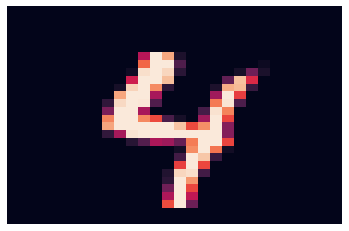

In [ ]:
sns.heatmap(x_train[random_index], cbar=False, xticklabels=False, yticklabels=False)

Reshape data so it is just a single line per handwritten digit

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to binary class matrices

In [ ]:
print(y_train[100])

5


We need to do the one-hot encoding (adding statistical dummy variables to represent classes)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(y_train[100])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Start with a very simple model

In [ ]:
model1 = Sequential()
model1.add(Dense(8, activation="sigmoid", input_shape=(784,)))
model1.add(Dense(10, activation="softmax"))

Print the model summary

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


Lets compile it using the categorical_crossentropy since this is a classification problem

In [ ]:
model1.compile(loss='mse', optimizer="sgd",
               metrics=['accuracy'])

Do the training

In [ ]:
history = model1.fit(x_train, y_train,
                     epochs=5,
                     verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0911 - accuracy: 0.1417
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0871 - accuracy: 0.2095
Epoch 3/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0842 - accuracy: 0.2800
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0820 - accuracy: 0.4116
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0801 - accuracy: 0.4743


Evaluate the quality of the model

In [ ]:
score = model1.evaluate(x_test, y_test, verbose=0)
print(score[1])


0.5295
